In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
class vertex:
    def __init__(self,x,y, name = None, typ = None):
        self.x = x
        self.y = y
        self.name = name
        self.typ = typ
    
    def __repr__(self):
        return f'({self.x},{self.y})'
    
    def __str__(self):
        return self.name
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __lt__(self, other):
        return self.y > other.y or (self.y == other.y and self.x < other.x)
    
    def cross_prod(self, orig, obj):
        return (obj.x - orig.x)*(self.y-orig.y)-(obj.y-orig.y)*(self.x-orig.x)

In [9]:
class edge:
    def __init__(self, v1 ,v2, next_a = None, prev_a = None, name = None):
        self.ini = v1
        self.fin = v2
        self.next_a = next_a
        self.prev_a = prev_a
        self.name = name
    
    def __repr__(self):
        return f'{self.ini} ---> {self.fin}'
                 
    def __str__(self):
        return self.name

In [10]:
class edge_list:
    def __init__(self, ps):
        self.v = [vertex(x[0], x[1]) for x in ps]
        self.v.reverse()
        aux = self.v.copy()
        aux.append(aux.pop(0))
        aux = [*zip(self.v, aux)]
        self.edges = [edge(x[0],x[1]) for x in aux]
        self.name()
        self.connect()
        self.classify()
        
    def name(self):
        for i in range(len(self.v)):
            self.v[i].name = f'V{i}'
        for i in range(len(self.edges)):
            self.edges[i].name = f'e{i}'
            
    
    def connect(self):
        for i in range(-1,len(self.edges)-1):
                self.edges[i].next_a = self.edges[i+1]
                self.edges[i].prev_a = self.edges[i-1]
                
    def classify(self):
        for v in self.v:
            for e in self.edges:
                if e.ini == v:
                    nex = e.fin
                elif e.fin == v:
                    pre = e.ini
            if v < nex and v < pre:
                turn = nex.cross_prod(pre, v)
                if turn < 0:
                    v.typ = 'Div'
                elif turn > 0:
                    v.typ = 'Ini'
            elif nex < v and pre < v:
                turn = nex.cross_prod(pre, v)
                if turn < 0:
                    v.typ = 'Mer'
                elif turn > 0:
                    v.typ = 'Fin'
            else:
                v.typ = 'Reg'
    
    def lista(self):
        edges = []
        origin = []
        next_e = []
        prev_e = []
        
        for i in range(len(self.edges)):
            edges.append(self.edges[i].name)
            origin.append(self.edges[i].ini)
            next_e.append(self.edges[i].next_a)
            prev_e.append(self.edges[i].prev_a)
        return pd.DataFrame.from_dict({'Aristas': edges, 'Origen': origin, 'Next': next_e, 'Prev': prev_e})
         
         
    
    def plot_dir(self):
        xcoord = [v.x for v in self.v]
        ycoord = [v.y for v in self.v]
        plt.scatter(xcoord,ycoord)
        for v in self.v:
            plt.annotate(v.name, (v.x,v.y))
        for e in self.edges:
            plt.arrow(e.ini.x, e.ini.y, e.fin.x-e.ini.x, e.fin.y-e.ini.y, head_width=0.25)
        plt.show()

    def plot_typ(self):
        #xcoord = [v.x for v in self.v]
        #ycoord = [v.y for v in self.v]
        #plt.scatter(xcoord,ycoord)
        for v in self.v:
            if v.typ == 'Div':
                plt.scatter(v.x,v.y, marker = '^', s = 100)
            elif v.typ == 'Mer':
                plt.scatter(v.x,v.y, marker = 'v', s = 100)
            elif v.typ == 'Ini':
                plt.scatter(v.x,v.y, marker = '*', s = 100)
            elif v.typ == 'Fin':
                plt.scatter(v.x,v.y, marker = 's', s = 100)
            elif v.typ == 'Reg':
                plt.scatter(v.x,v.y, s = 100)
            else:
                print('Error')
            plt.annotate(v.name, (v.x,v.y))
            
        for e in self.edges:
            plt.plot([e.ini.x, e.fin.x], [e.ini.y, e.fin.y])
        plt.show()

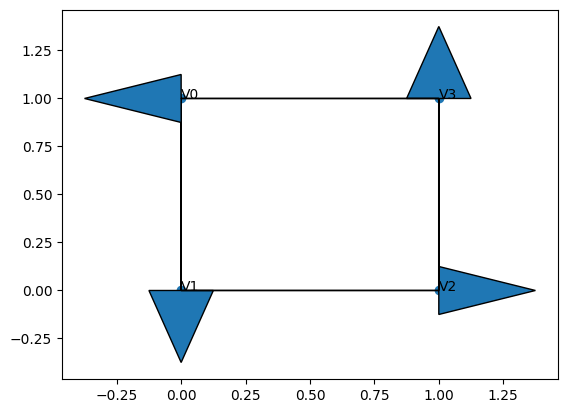

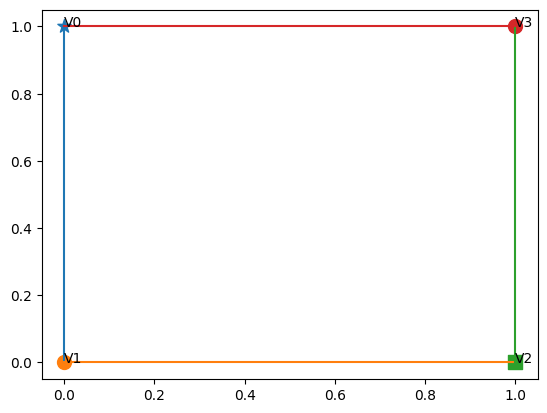

,Aristas,Origen,Next,Prev
0,e0,V0,e1,e3
1,e1,V1,e2,e0
2,e2,V2,e3,e1
3,e3,V3,e0,e2


In [11]:
P = [(1,1), (1,0), (0,0), (0,1)]
AP = edge_list(P)
AP.plot_dir()
AP.plot_typ()
AP.lista()

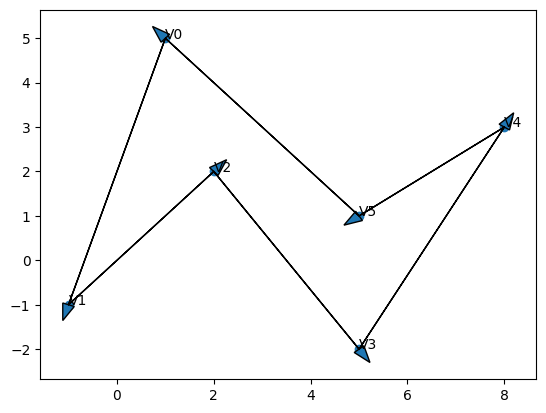

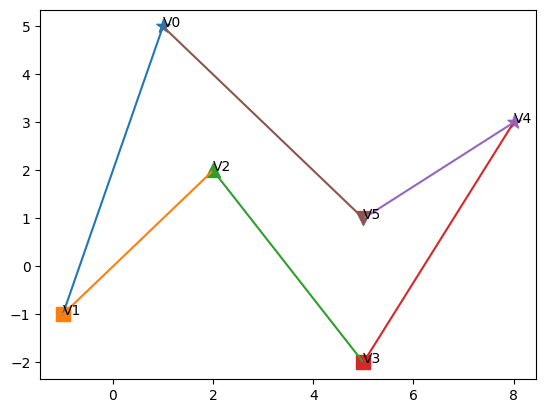

,Aristas,Origen,Next,Prev
0,e0,V0,e1,e5
1,e1,V1,e2,e0
2,e2,V2,e3,e1
3,e3,V3,e4,e2
4,e4,V4,e5,e3
5,e5,V5,e0,e4


In [12]:
P = [(5,1), (8,3), (5,-2), (2,2), (-1,-1), (1,5)]
AP = edge_list(P)
AP.plot_dir()
AP.plot_typ()
AP.lista()